# TPC2 - Cadeias de Markov

*  Não deve escrever o seu nome nem nenhum código identificador em nenhum
sítio. 
* Deve entregar ESTE Notebook de Jupyter.
* O trabalho é individual. Podem e devem haver discussões com colegas
mas o resultado entregue é individual. 
* Não deve acrescentar ou apagar nenhuma célula.
* Todas as explicações devem ser claras e concisas. 
* É preferível fazer menos e fazer bem que muito e mal. 
* A não verificação de alguma destas regras leva ao anulamento e exclusão
da prova.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd
import scipy as scipy
#import spicy as sp
%matplotlib inline
#plt.rcParams['figure.figsize']=(15,8)

## Pergunta 1
***Partícula num potencial:*** 
Considere uma partícula que se move
num potencial de energia livre dependente da posição dado por 
\begin{equation}
V_{\beta}(x)=x^{4}-2(\beta-1)x^{2}
\end{equation}
supondo que a partícula está em contacto térmico com um reservatório
de calor caracterizado por $\beta$ (inverso da temperatura) e a distribuição
de probabilidade da partícula estar numa dada posição é dada por 
\begin{equation}
\rho_{\beta}(x)=\frac{e^{-\beta V_{\beta}(x)}}{Z(\beta)}
\end{equation}
onde $Z(\beta)$ é a função de partição do sistema.

1. Considere o passeio aleatório especial: A variável $x$ é discreta
e toma valores $x_{n}=0.04n$ com $n\in\mathbb{Z}$. Em cada tempo
o caminhante decide se tenta saltar para a direita ($\Delta x=0.04$)
ou para esquerda ($\Delta x=-0.04$) com probabilidade $1/2$ e aceita
a proposta com 
\begin{equation}
p_{A}(x(t-1)\to x(t-1)+\Delta x)=\min\left(1,e^{-\beta\left(V_{\beta}(x(t-1)+\Delta x)-V_{\beta}(x(t-1))\right)}\right)
\end{equation}
Se aceitou a sua variável $x$ altera-se para $x+\Delta x$, caso
contrário, fica no mesmo valor de $x$. 

$\qquad$a) Escreva uma função que implementa este algoritmo durante um tempo $t$ partindo de uma posição inicial (devolve o valor de $x$ ao fim desse tempo).

Responda Aqui

In [2]:
def potencial(beta,x):
        return x**4 - 2*(beta-1)*x**2
    
def passeio_aleatório(x0,T,beta,N):
    '''
    Função que retorna a posição final de N caminhantes no passeio, após um intervalo de tempo T
    x0 - posição inicial
    T -intervalo de tempo
    beta - parâmetro da distribuição 
    N - número de walkers
    '''
    
    #def dist_probabilidade(beta,x): #não normalizada
    #    return np.exp(-1*beta*potencial(beta,x))
    
    xs=np.zeros([N,T+1])
    ts=np.arange(T)
    xs[:,0]=x0
    for i,t in enumerate(ts):
        #definir se vai para a direita ou para a esquerda no passo i para os N walkers
        dx=np.where(rd.random_sample(N)<0.5,0.04,-0.04)
        #definir se vai aceitar a proposta 
        prob=np.exp(-beta*(potencial(beta,xs[:,i]+dx)-potencial(beta,xs[:,i])))
        aceitar=np.where(prob<1,prob,1)
        
        prob2=rd.random_sample(N)
        i_a=np.where(prob2<aceitar)[0] #indices dos passos aceites
        i_r=np.where(prob2>aceitar)[0] #indices dos passos recusados
        
        xs[i_a,i+1]=xs[i_a,i]+dx[i_a]
        xs[i_r,i+1]=xs[i_r,i]
        
        #limitar para x in [-2,2]
        xs[i_a,i+1]=np.where(abs(xs[i_a,i+1])<=2,xs[i_a,i+1],xs[i_a,i])
            
    return xs[:,-1]

print(passeio_aleatório(0,10,1.4,5))

[ 8.00000000e-02 -1.38777878e-17 -8.00000000e-02 -8.00000000e-02
 -8.00000000e-02]


$\qquad$ b) Escreva uma matriz de Markov que representa este algoritmo limitando a variável de posição ao intervalo $x\in[-2,2]$ - Sempre que uma proposta tentar sair do intervalo recusa.

Responda Aqui

In [3]:
def Markov(N,beta):
    
    def A(i,j): #função de aceitação do passo
        xi=-2+0.04*i
        xj=-2+0.04*j
        prob=np.array([1,np.exp(-beta*(potencial(beta,xi)-potencial(beta,xj)))])
        return np.min(prob)
    
    M=np.zeros([N,N])
    #Preencher cada uma das diagonais da matriz
    M[0,0]=1-0.5*A(1,0)
    M[1,0]=0.5*A(1,0)
    M[0,1]=0.5*A(0,1)
    for i in range(1,N-1):
        M[i,i]=1-0.5*A(i+1,i)-0.5*A(i-1,i)
        M[i+1,i]=0.5*A(i+1,i)
        M[i,i+1]=0.5*A(i,i+1)
        
    M[-1,-1]=1-0.5*A(N-2,N-1)
    return M

M=Markov(101,1.4)
print(M)


[[0.5        0.10490581 0.         ... 0.         0.         0.        ]
 [0.5        0.39509419 0.11590238 ... 0.         0.         0.        ]
 [0.         0.5        0.38409762 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.38409762 0.5        0.        ]
 [0.         0.         0.         ... 0.11590238 0.39509419 0.5       ]
 [0.         0.         0.         ... 0.         0.10490581 0.5       ]]


2. Para $\beta=1.4$

$\qquad$ a) Escolha um valor de $x_{0}=0$ para o seu caminhante no instante inicial
$t=0$. 

Responda Aqui

In [4]:
x0=0

$\qquad$ b) Evolua a distribuição de probabilidades durante um tempo $t=1,4,16,64,256,512$ e represente a distribuição de probabilidade da simulação para esses instantes.

Responda Aqui

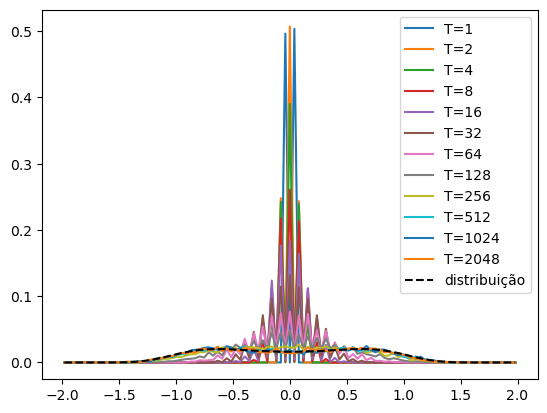

In [5]:
xs=np.linspace(-2,2,101)
Z=np.sum(np.exp(-1.4*potencial(1.4,xs)))

def hist_densidade(amostra,a,b,M):
    '''
    amostra- amostra a partir da qual se quer construir um histograma de frequências relativas
    a - limite inferior do domínio do histograma
    b - limite superior do domínio do histograma
    '''
    
    pos = np.where((amostra>a)&(amostra<b))[0]
    amostrab=amostra[pos]
    
    classes=np.zeros(M)
    indices=((amostrab-a)/(b-a)*M).astype('int')
    for i in indices:
        classes[i]+=1
        
    dx=(b-a)/M   
    xs=np.linspace(a+dx/2,b-dx/2,M)
    
    return xs,classes/len(amostrab)

TS=2**np.arange(12)
for T in TS:
    amostra=passeio_aleatório(x0,T,1.4,5000)
    xs,ys=hist_densidade(amostra,-2,2,101)
    plt.plot(xs,ys,label='T={}'.format(T))
    
plt.plot(xs,np.exp(-1.4*potencial(1.4,xs))/Z,'--k',label='distribuição')
plt.legend()
plt.show()

$\qquad$ c) Calcule a matriz de Markov que obteve em 1.b) e calcule para cada
um destes tempos calcule e represente, 
\begin{equation}
\sum_{j}[\Omega^{t}]_{ij}P_{j}(0)
\end{equation}
Será que a matriz de Markov representa exactamente o algoritmo implementado? 

Responda Aqui

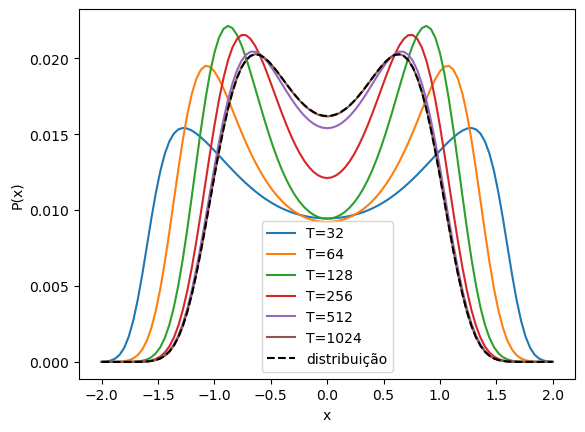

In [6]:
TS=2**np.arange(5,11)
P0=np.ones(101)/101 #distribuição uniforme
#P0=np.zeros(101)  #começar com x0=0
#P0[50]=1
M=Markov(101,beta=1.4)
xs=np.linspace(-2,2,101)
for T in TS:
    Pt=np.dot(np.linalg.matrix_power(M,T),P0)
    plt.plot(xs,Pt,label='T={}'.format(T))
    
plt.plot(xs,np.exp(-1.4*potencial(1.4,xs))/Z,'--k',label='distribuição')
plt.legend()
plt.xlabel('x')
plt.ylabel('P(x)')
plt.show()

$\qquad $d) Para a matrix de Markov calculada em 1.b) obtenha o espectro de valores
próprios e os vectores próprios à direita e à esquerda usando os módulos
de python ( por exemplo $scipy.linalg.eig$ ou o $mpmath.eig$ se precisar
de maior precisão). Garanta que os vectores estão normalizados e são
ortogonais:
\begin{equation}
\sum_{i}l_{i}^{(n)}r_{i}^{(m)}=\delta_{mn}
\end{equation}
onde $m$ e $n$ são índices dos valores próprios, $r_{i}^{(n)}$
é o vector próprio à direita e $l_{i}^{(n)}$ p vector próprio à esquerda
($i$ são os indices do espaço de eventos). Verifique que para cada
tempo considerado a distribuição de probabilidade é dada por 
\begin{equation}
P_{i}(t)=\sum_{n}\lambda_{n}^{t}a_{n}r_{i}^{(n)}
\end{equation}
onde $a_{n}=\sum_{i}l_{i}^{(n)}P_{i}(0)$.

$\qquad$ i) Quantos valores próprios $\lambda=1$ obtém?

Responda Aqui

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


C:\Users\gbs77\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


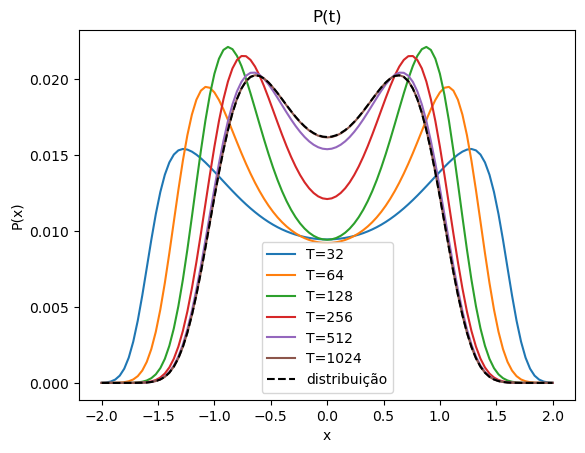

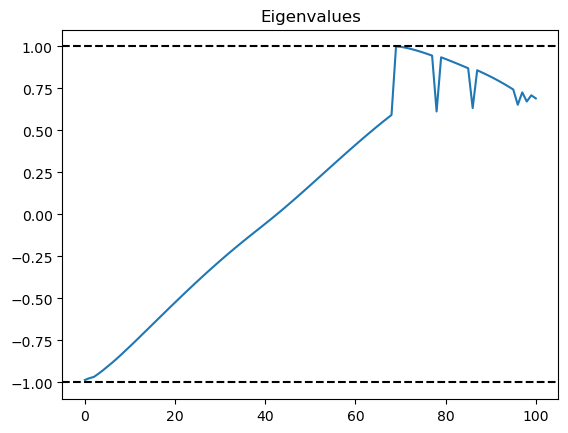

[ 1.          0.99846312  0.99333635  0.98738026  0.98047466  0.97263843
  0.96413953  0.95510717  0.94556233  0.93561129  0.92537427  0.91478492
  0.90400109  0.89298798  0.88173324  0.87026001  0.85844794  0.84621329
  0.83351439  0.82017801  0.80626225  0.79167679  0.77643155  0.76057943
  0.74408114  0.72698237  0.70934023  0.6910881   0.67235228  0.65308521
  0.63331905  0.61311907  0.59245561  0.57136967  0.54992673  0.52806398
  0.50589754  0.48339975  0.46059166  0.43754503  0.41423932  0.39071148
  0.36703156  0.34315007  0.31917275  0.2950889   0.27092026  0.24674296
  0.22254208  0.19837077  0.17428867  0.1502738   0.12643201  0.10275719
  0.07929666  0.05612456  0.03322387  0.01067587 -0.01152756 -0.03341087
 -0.0549728  -0.07635851 -0.09763355 -0.11894221 -0.14042453 -0.16210019
 -0.18410835 -0.20640285 -0.22902515 -0.25200293 -0.27525754 -0.29886072
 -0.32277282 -0.34692419 -0.37144721 -0.3961582  -0.42115082 -0.44642697
 -0.47184626 -0.49750287 -0.52341552 -0.54931398 -0

In [7]:
evalues,V_l,V_r = scipy.linalg.eig(M,left=True,right=True)

plt.title('Representação do produto escalar l^{n} * r^{n}')
for i in range(len(evalues)):
    V_l[:,i]=V_l[:,i]/(V_r[:,i]@V_l[:,i])
    
print(np.diag(np.dot(np.transpose(V_r),V_l)))


#determinação de an
an=np.dot(np.transpose(V_l),P0)
for T in TS:
    #calcular pt através dos valores e vetores próprios
    Pt=np.dot(evalues**T*an,np.transpose(V_r))
    plt.plot(xs,Pt,label='T={}'.format(T))
    
#representação da distribuição de probabilidade referência  
plt.title('P(t)')
plt.plot(xs,np.exp(-1.4*potencial(1.4,xs))/Z,'--k',label='distribuição')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()
plt.show()

plt.plot(evalues)
plt.title('Eigenvalues')
plt.axhline(y=1,linestyle='--',color='black',)
plt.axhline(y=-1,linestyle='--',color='black',)
plt.plot()
plt.show()
print(np.sort(evalues.real)[::-1])
print('Apenas um valor próprio é igual a 1')

$\qquad$ ii.) Será que a partir do espectro de valores próprios posso “advinhar ” a escala de tempo que a dinâmica demora a equilibrar? Como poderei obter esta escala? (Lembre-se que o módulo dos valores próprios é sempre menor ou igual a 1).

Responda Aqui

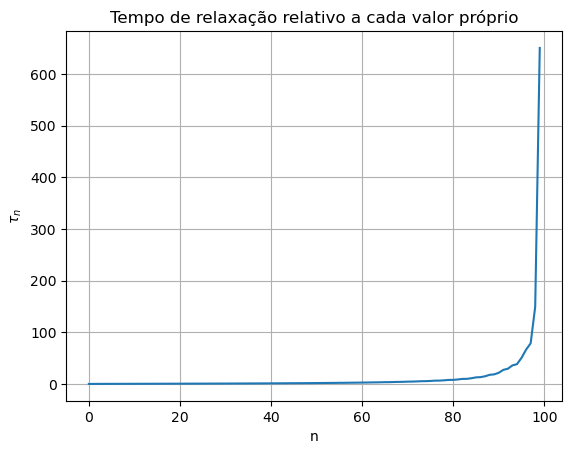

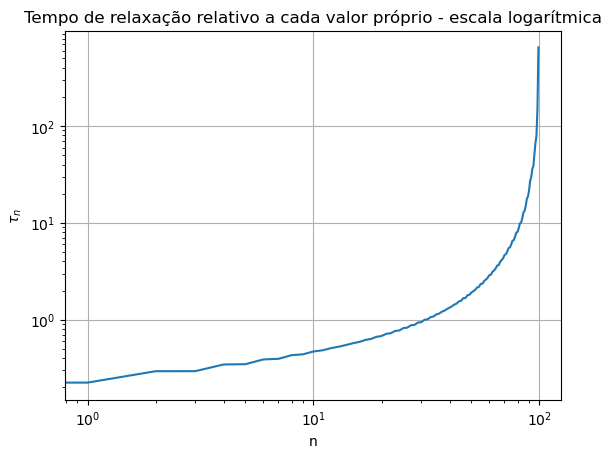

A escala de tempo que a dinâmica demora a estabilizar num estado estacionário é da ordem de 650.1698738345847


In [8]:
taus=1/np.log(1/abs(np.sort(evalues.real))[:-1])
plt.title('Tempo de relaxação relativo a cada valor próprio')
plt.plot(np.sort(taus))
plt.ylabel('$\\tau_n$')
plt.xlabel('n')
plt.grid()
plt.show()

plt.title('Tempo de relaxação relativo a cada valor próprio - escala logarítmica')
plt.plot(np.sort(taus))
plt.ylabel('$\\tau_n$')
plt.xlabel('n')
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.show()

print('A escala de tempo que a dinâmica demora a estabilizar num estado estacionário é da ordem de {}'.format(taus[-1].real))

$\qquad$ e) Para $\beta=2.4$ existem muitas diferenças com a posição inicial
quando a simulação inicia em $x=0,x=-1.5$ ou $x=1.5$: Existe apenas
uma distribuição de equilíbrio mas dependendo da distribuição inicial
pode demorar muito ($x=\pm1.5$ ) ou pouco ($x=0$) tempo a ser atingida.
À luz do espectro de valores próprios do sistema como posso entender este fenómeno?

Responda Aqui

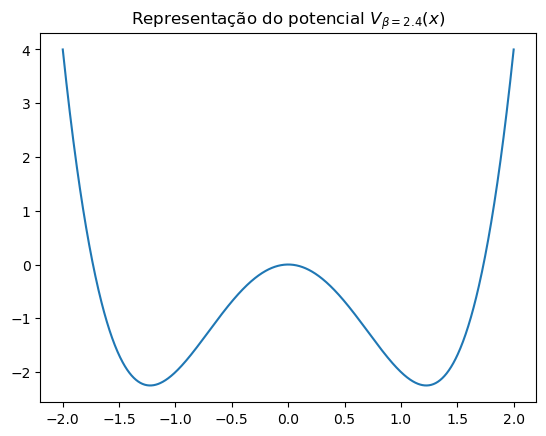

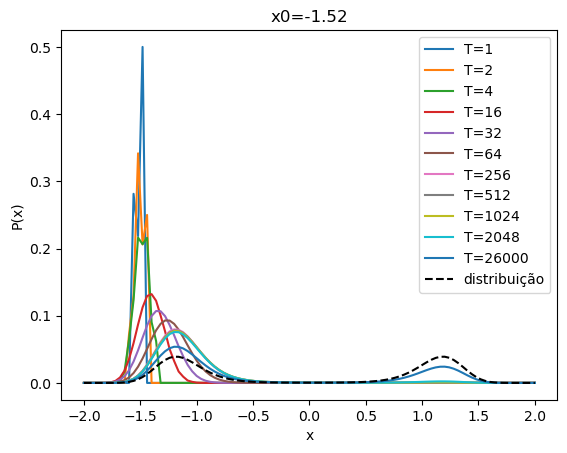

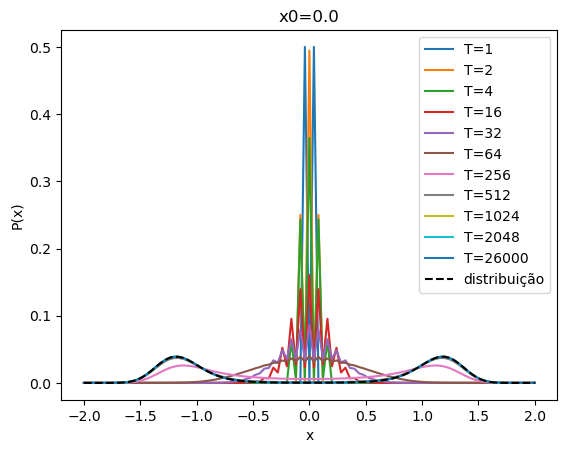

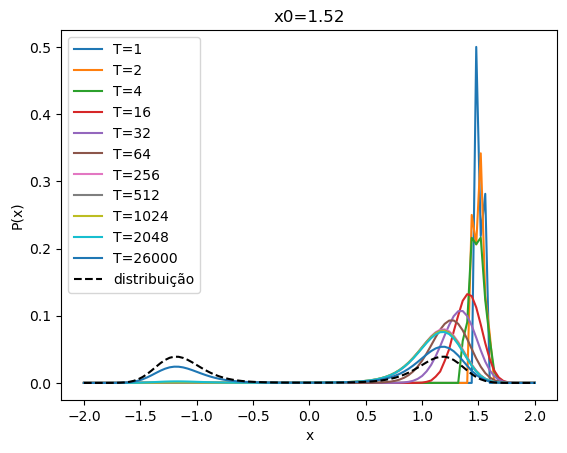

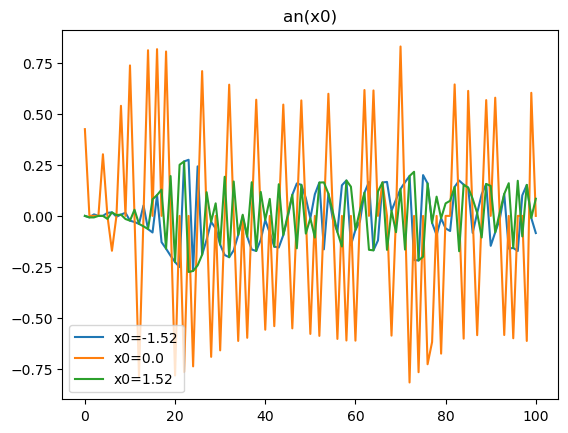

O maior tempo de relaxação associado à matriz de Markov é 26384.505948819235


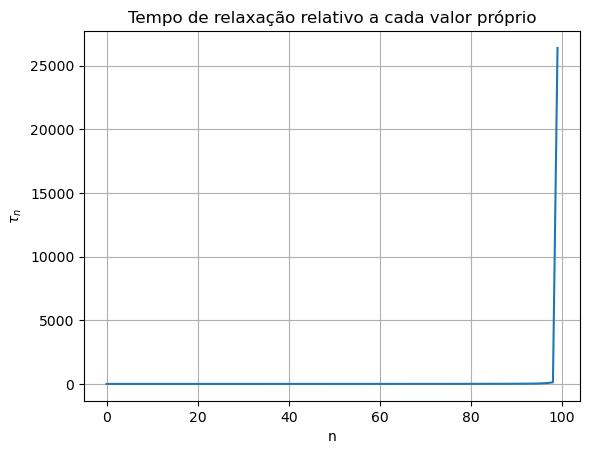

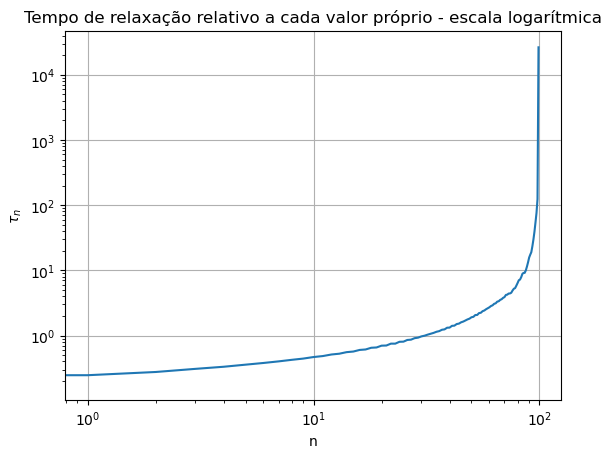

In [9]:
xsp=np.linspace(-2,2,1024)
plt.title('Representação do potencial $V_{\\beta = 2.4}(x)$')
plt.plot(xsp,xsp**4 - 3*xsp**2)
plt.show()
#calculo da função partição
xs=np.linspace(-2,2,101)
Z=np.sum(np.exp(-2.4*potencial(2.4,xs)))
#Repetindo os processos para beta=2.4

#Através da função passeio


#TS=2**np.arange(5,13)
#x0s=np.array([0,-1.5,1.5])
#for x0 in x0s:
#    for T in TS:
#        amostra=passeio_aleatório(x0,T,2.4,5000)
#        xs,ys=hist_densidade(amostra,-2,2,101)
#        plt.plot(xs,ys,label='T={}'.format(T))
#    
#    plt.title('x0={}'.format(x0))
#    plt.plot(xs,np.exp(-2.4*potencial(2.4,xs))/Z,'--k',label='distribuição')
#    plt.legend()
#    plt.xlim([-2,2])
#    plt.show()
    
#Através das matrizes de Markov
xs=np.linspace(-2,2,101)
M2=Markov(101,beta=2.4) #definir matriz de Markov

#repetir a análise anterior

evalues,V_l,V_r = scipy.linalg.eig(M2,left=True,right=True)

#normalização do produto escalar dos vetores próprios
plt.title('Representação do produto escalar l^{n} * r^{n}')
for i in range(len(evalues)):
    V_l[:,i]=V_l[:,i]/(V_r[:,i]@V_l[:,i])
    

#3 condições diferentes de posição inicial
P0=np.zeros([3,101])

P0[2,88]=1 #começar em x0=1.52
P0[0,12]=1 #começar em x0=-1.52
P0[1,50]=1 #começar em x0=0
#determinação de an

anmatriz=np.zeros([3,101]) #matriz para guardar os valores de an
TS=np.array([1,2,4,16,32,64,256,512,1024,2048,26000])

for i in range(3):
    an=np.dot(np.transpose(V_l),P0[i]) #determinação de an
    anmatriz[i]=an #guardar na matriz
    x0=1.52*i-1.52
    for T in TS:
        #calcular pt através dos valores e vetores próprios
        Pt=np.dot(evalues**T*an,np.transpose(V_r))
        #representação gráfica
        plt.plot(xs,Pt,label='T={}'.format(T))
        
    plt.title('x0={}'.format(x0))   
    #representação da distribuição de probabilidade referência  
    plt.plot(xs,np.exp(-2.4*potencial(2.4,xs))/Z,'--k',label='distribuição')
    plt.xlabel('x')
    plt.ylabel('P(x)')
    plt.legend()
        
    plt.show()

plt.title('an(x0)')
for i in range(3):
    plt.plot(anmatriz[i],label='x0={}'.format(1.52*i-1.52))
    
plt.legend()
plt.show()

#plt.plot(evalues,'.')
#plt.title('Eigenvalues')
#plt.axhline(y=1,linestyle='--',color='black',)
#plt.axhline(y=-1,linestyle='--',color='black',)
#plt.plot()
#plt.show()
#print(np.sort(evalues.real)[::-1])
#print('Apenas um valor próprio é igual a 1')



taus=1/np.log(1/np.abs(np.sort(evalues.real)[:-1]))
print('O maior tempo de relaxação associado à matriz de Markov é',taus[-1])
plt.title('Tempo de relaxação relativo a cada valor próprio')
plt.plot(np.sort(taus))
plt.ylabel('$\\tau_n$')
plt.xlabel('n')
plt.grid()
plt.show()

plt.title('Tempo de relaxação relativo a cada valor próprio - escala logarítmica')
plt.plot(np.sort(taus))
plt.ylabel('$\\tau_n$')
plt.xlabel('n')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()

## Pergunta 2

**Correlações:** Para $\beta=2$ o valor médio da posição é nulo.
Sabemos que para um determinado tempo, a distribuição de probabilidade
deixa de depender do tempo e torna-se a distribuição assimptótica
(igual para todos os tempos seguintes). Se construirmos uma amostra
de $T$ valores a partir da sequência visitada pelo passeio aleatório
para tempos superiores ao tempo de equilíbrio ($\tau$), a distribuição
de probabilidade de cada um dos valores é igual à distribuição assimptótica.
Logo o valor médio desta amostra tenderá para o valor exacto (zero),

\begin{equation}
\lim_{T\to+\infty}\frac{1}{T}\sum_{t=0}^{T-1}x(\tau+t)=0.
\end{equation}

O teorema do limite central diz-nos que o erro da medida com $T$
medições deverá ser da ordem de 
\begin{equation}
Erro(T)=\frac{\sigma}{\sqrt{T}}
\end{equation}

onde $\sigma$ é o desvio padrão de uma única medição. 

1) Estime o valor do erro do valor médio ($\langle x\rangle=0$) obtido $T$ medições consecutivas através de 
    \begin{align*}
    \overline{x}_{T}(k) & =\frac{1}{T}\sum_{t=0}^{T-1}x_{k}(\tau+t)\\
    Erro(T) & =\frac{1}{M}\sum_{k=0}^{M-1}(\overline{x}_{T}(k)-\left\langle x\right\rangle )^{2}
    \end{align*}
onde $\overline{x}_{T}(k)$ é o estimador do valor médio obtido na simulação $k$ medindo $T$ valores de posição consecutivos a partir de $t>\tau$ onde $\tau$ é um tempo maior do que o necessário para atingir o equilíbrio. O erro é o valor médio do desvio de cada estimador em relação ao valor exacto em $M$ simulações independentes.

Responda Aqui

Máximo tempo de relaxação: 2842.958206689379


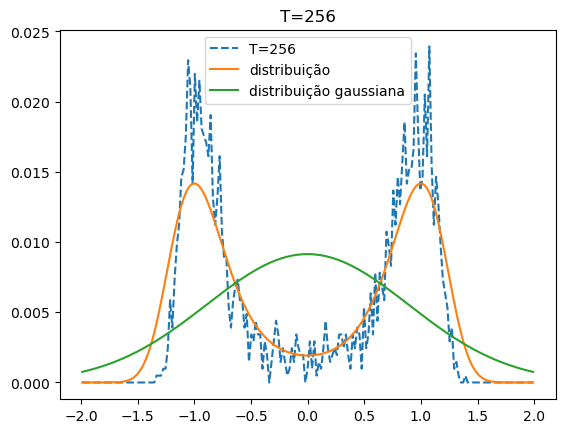

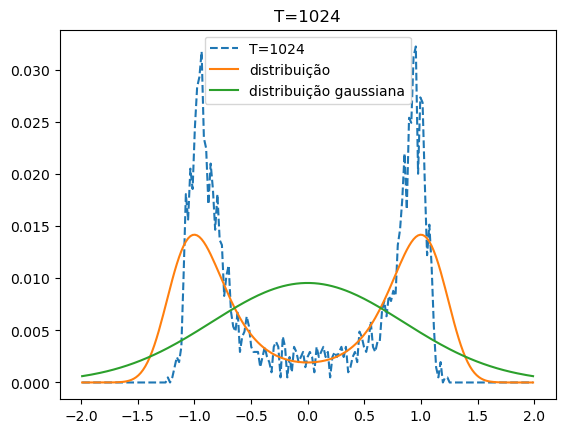

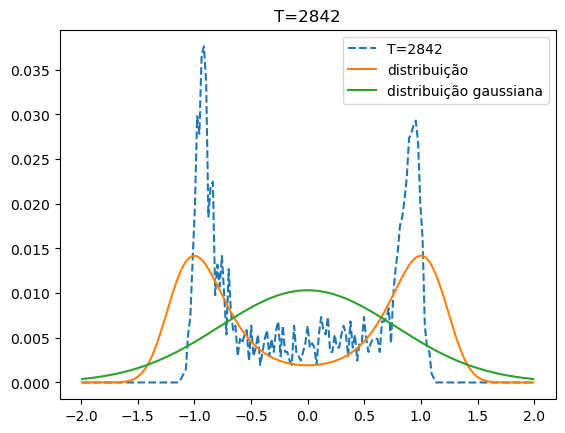

In [ ]:
%%time
xs3=np.linspace(-2,2,201)
beta=2
Z=np.sum(np.exp(-beta*potencial(beta,xs3))) #função partição

#determinação do tempo de equilíbrio a partir do tempo de relaxação
M3=Markov(101,beta=2) #definir matriz de Markov
evalues,V_l,V_r = scipy.linalg.eig(M3,left=True,right=True)
taus=1/np.log(1/np.sort(evalues)[:-1])
t_eq=np.sort(taus)[-1]
print('Máximo tempo de relaxação:',t_eq.real)

#nova função passeio aleatório para guardar percurso do walker
def passeio_aleatório2(x0,T,beta,N):
    '''
    Função que retorna a posição final do caminhante no passeio, após um intervalo de tempo T
    x0 - posição inicial
    T -intervalo de tempo
    beta - parâmetro da distribuição 
    N - número de walkers
    '''
    
    #def dist_probabilidade(beta,x): #não normalizada
    #    return np.exp(-1*beta*potencial(beta,x))
    
    xs=np.zeros([N,T+1])
    ts=np.arange(T)
    xs[:,0]=x0
    for i,t in enumerate(ts):
        #definir se vai para a direita ou para a esquerda no passo i para os N walkers
        dx=np.where(rd.random_sample(N)<0.5,0.04,-0.04)
        #definir se vai aceitar a proposta 
        prob=np.exp(-beta*(potencial(beta,xs[:,i]+dx)-potencial(beta,xs[:,i])))
        aceitar=np.where(prob<1,prob,1)
        
        prob2=rd.random_sample(N)
        i_a=np.where(prob2<aceitar)[0] #indices dos passos aceites
        i_r=np.where(prob2>aceitar)[0] #indices dos passos recusados
        
        xs[i_a,i+1]=xs[i_a,i]+dx[i_a]
        xs[i_r,i+1]=xs[i_r,i]
        
        #limitar para x in [-2,2]
        xs[i_a,i+1]=np.where(abs(xs[i_a,i+1])<=2,xs[i_a,i+1],xs[i_a,i])
            
    return xs

TS=np.array([256,1024,int(t_eq.real),2*int(t_eq.real),5*int(t_eq.real),10*int(t_eq.real)])
#TS=np.array([1,2,4,16,64,256,1024])
M=2048
erros=np.zeros(len(TS))

for j,T in enumerate(TS):
    t=T+int(t_eq.real)
    xs=passeio_aleatório2(0,t,2,M)[:,-T:]
    #media para cada caminhante
    xmedio=np.sum(xs,axis=1)/T
    erros[j] = (1/M)*np.sum(xmedio**2)
    
    amostra=xmedio
    classes,bins=hist_densidade(amostra,-2,2,201)
    plt.title('T={}'.format(T))
    plt.plot(classes,bins,'--',label='T={}'.format(T))
    #distribuição de boltzmann
    plt.plot(classes,np.exp(-2*potencial(2,classes))/Z,label='distribuição')
    #distribuição gaussiana
    #normalização - constante de normalização ZG
    ZG=np.sum(np.exp(-0.5*(classes)**2/erros[j]))
    plt.plot(classes,np.exp(-0.5*(classes)**2/erros[j])/ZG,label='distribuição gaussiana')
    plt.legend()
    plt.show()
    
    
    
plt.plot(TS,erros)
plt.show()
plt.plot(TS,erros,label='Erro(T)')
plt.plot(TS,1/np.sqrt(TS),label='1/$\sqrt{T}$')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

2. Note que pode estimar o desvio padrão de uma medida calculando o valor
médio 
\begin{equation}
\sigma\approx\sqrt{\frac{1}{M}\sum_{k=0}^{M-1}x_{k}^{2}(\tau)}
\end{equation}
a dispersão do ponto inicial. Será que a lei eq: \ref{eq:erro} é
verificada? Represente como função de $T$ a sua estimativa do erro
($T=1,2,4,16,64,256,1024$). Comente o resultado. 

Responda Aqui

0.9163728498815318


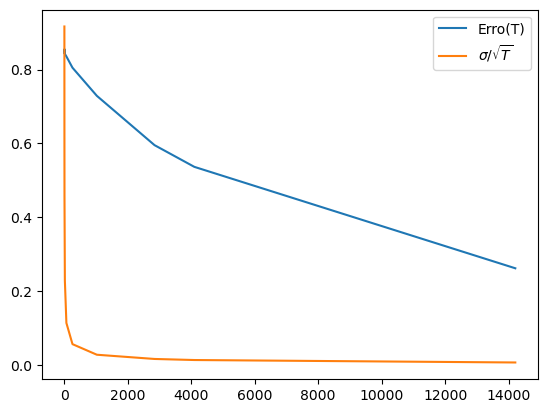

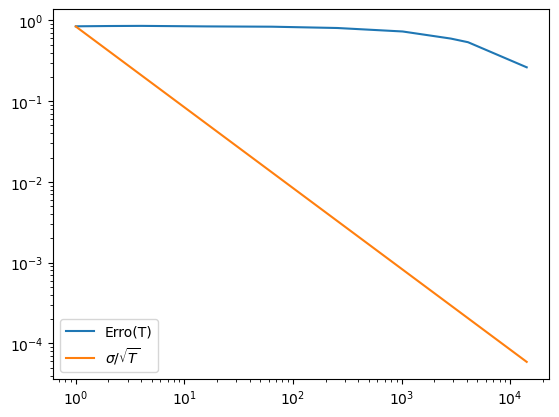

In [11]:
xs=passeio_aleatório(0,int(t_eq.real),2,M)
sigma=np.sqrt(np.sum(xs**2)/M)
print(sigma)

plt.plot(TS,erros,label='Erro(T)')
plt.plot(TS,sigma/np.sqrt(TS),label='$\\sigma$/$\sqrt{T}$')
plt.legend()
plt.show()
plt.plot(TS,erros,label='Erro(T)')
plt.plot(TS,sigma**2/TS,label='$\\sigma$/$\sqrt{T}$')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

### Bom Trabalho